,NO_OF_ROAD_WORK_SANCTIONED,NO_OF_ROAD_WORKS_COMPLETED,NO_OF_ROAD_WORKS_BALANCE,LENGTH_OF_ROAD_WORK_SANCTIONED_KM,COST_OF_WORKS_SANCTIONED_LAKHS,EXPENDITURE_OCCURED_LAKHS,completion_pct
NO_OF_ROAD_WORK_SANCTIONED,1.000000,0.997774,-0.026917,0.930866,0.794059,0.803456,0.168716
NO_OF_ROAD_WORKS_COMPLETED,0.997774,1.000000,-0.093523,0.926899,0.783267,0.801686,0.203562
NO_OF_ROAD_WORKS_BALANCE,-0.026917,-0.093523,1.000000,0.003349,0.113893,-0.021904,-0.532487
LENGTH_OF_ROAD_WORK_SANCTIONED_KM,0.930866,0.926899,0.003349,1.000000,0.888426,0.893376,0.173290
COST_OF_WORKS_SANCTIONED_LAKHS,0.794059,0.783267,0.113893,0.888426,1.000000,0.976596,0.100152
EXPENDITURE_OCCURED_LAKHS,0.803456,0.801686,-0.021904,0.893376,0.976596,1.000000,0.200328
completion_pct,0.168716,0.203562,-0.532487,0.173290,0.100152,0.200328,1.000000


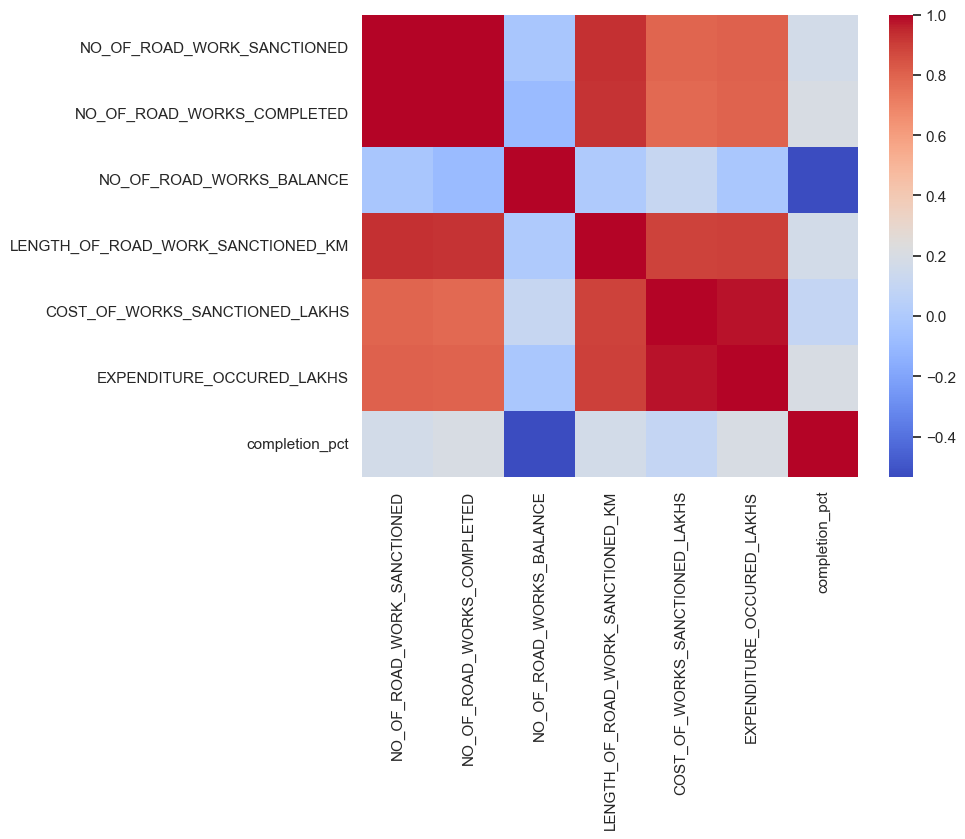

,Feature,Coefficient
5,EXPENDITURE_OCCURED_LAKHS,27.386547
3,LENGTH_OF_ROAD_WORK_SANCTIONED_KM,4.338894
1,NO_OF_ROAD_WORKS_COMPLETED,-0.224913
0,NO_OF_ROAD_WORK_SANCTIONED,-0.994023
2,NO_OF_ROAD_WORKS_BALANCE,-11.115431
4,COST_OF_WORKS_SANCTIONED_LAKHS,-25.675920


,Residual_Mean,Residual_STD,Residual_Min,Residual_Max
0,0.884143,20.718575,-87.310392,61.830997


,Feature,Importance
2,NO_OF_ROAD_WORKS_BALANCE,0.370469
1,NO_OF_ROAD_WORKS_COMPLETED,0.244153
5,EXPENDITURE_OCCURED_LAKHS,0.181920
3,LENGTH_OF_ROAD_WORK_SANCTIONED_KM,0.072570
0,NO_OF_ROAD_WORK_SANCTIONED,0.066481
4,COST_OF_WORKS_SANCTIONED_LAKHS,0.064407


completion_pct                        EXPENDITURE_OCCURED_LAKHS  \
                       mean        min         max                      mean   
risk_cluster                                                                   
0                 96.017711  57.690893  116.989612                 96.108150   
1                 96.418833  67.892738  100.704488                695.555774   
2                 17.994194   0.000000   57.569569                 24.415977   

             LENGTH_OF_ROAD_WORK_SANCTIONED_KM  
                                          mean  
risk_cluster                                    
0                                   223.385566  
1                                  1720.135586  
2                                   106.725500

completion_pct       EXPENDITURE_OCCURED_LAKHS  \
                         mean count                      mean   
project_status                                                  
Delayed             31.149730   375                 41.223210   
On Track            97.358042  1921                170.952515   

               LENGTH_OF_ROAD_WORK_SANCTIONED_KM  
                                            mean  
project_status                                    
Delayed                               126.465680  
On Track                              411.518514

,Model,Metric,Value
0,Linear Regression,R2,0.357456
1,Random Forest,Accuracy,0.973913
2,K-Means,Clusters,3.000000


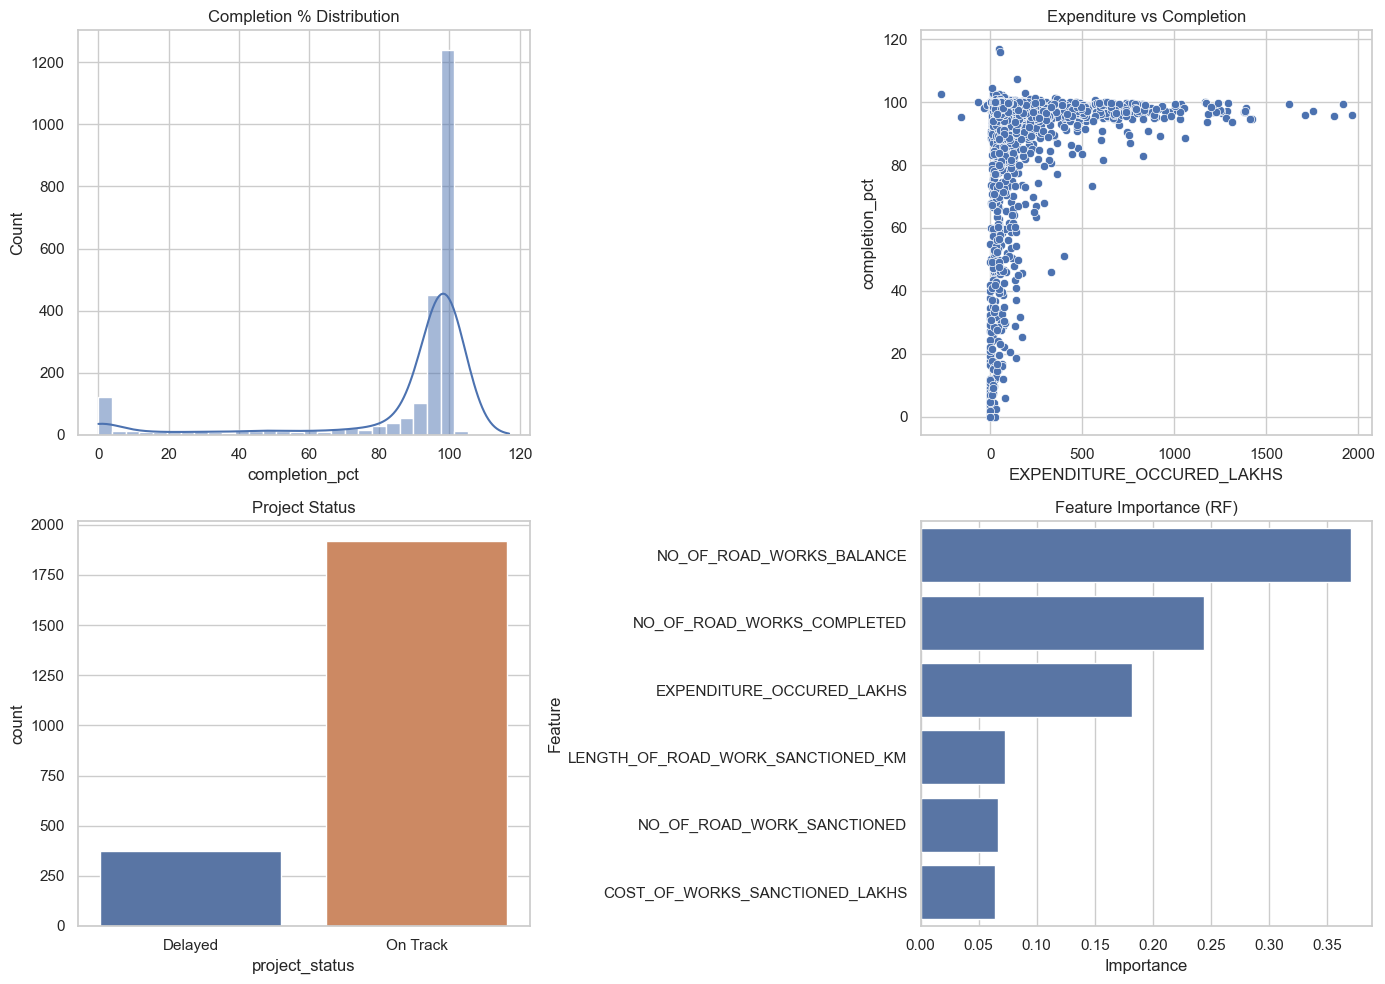

interactive(children=(Dropdown(description='Status:', options=('All', 'On Track', 'Delayed'), value='All'), Ou…

<function __main__.dashboard(status)>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
import ipywidgets as widgets
from IPython.display import display

sns.set_theme(style="whitegrid")
df = pd.read_csv("pmgsy_dataset.csv")
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
df["completion_pct"] = (
    df["LENGTH_OF_ROAD_WORK_COMPLETED_KM"] /
    df["LENGTH_OF_ROAD_WORK_SANCTIONED_KM"]
) * 100
df["completion_pct"] = df["completion_pct"].fillna(0)
df["project_status"] = np.where(df["completion_pct"] >= 80, "On Track", "Delayed")
features = [
    "NO_OF_ROAD_WORK_SANCTIONED",
    "NO_OF_ROAD_WORKS_COMPLETED",
    "NO_OF_ROAD_WORKS_BALANCE",
    "LENGTH_OF_ROAD_WORK_SANCTIONED_KM",
    "COST_OF_WORKS_SANCTIONED_LAKHS",
    "EXPENDITURE_OCCURED_LAKHS"
]

X = df[features]
corr_table = df[features + ["completion_pct"]].corr()
display(corr_table)
plt.figure(figsize=(8,6))
sns.heatmap(corr_table, cmap="coolwarm")
plt.show()

y_reg = df["completion_pct"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)
lr = LinearRegression()
lr.fit(X_train_s, y_train)
y_pred = lr.predict(X_test_s)
lr_results = {
    "MAE": mean_absolute_error(y_test, y_pred),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
    "R2": r2_score(y_test, y_pred)
}
lr_coeff_table = pd.DataFrame({
    "Feature": features,
    "Coefficient": lr.coef_
}).sort_values(by="Coefficient", ascending=False)

display(lr_coeff_table)
residuals = y_test - y_pred
residual_stats = pd.DataFrame({
    "Residual_Mean": [residuals.mean()],
    "Residual_STD": [residuals.std()],
    "Residual_Min": [residuals.min()],
    "Residual_Max": [residuals.max()]
})

display(residual_stats)

y_cls = df["project_status"]

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X, y_cls, test_size=0.2, random_state=42, stratify=y_cls
)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_c, y_train_c)
rf_acc = accuracy_score(y_test_c, rf.predict(X_test_c))
rf_importance_table = pd.DataFrame({
    "Feature": features,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

display(rf_importance_table)

cluster_data = df[
    ["LENGTH_OF_ROAD_WORK_SANCTIONED_KM",
     "EXPENDITURE_OCCURED_LAKHS",
     "completion_pct"]
]
cluster_scaled = scaler.fit_transform(cluster_data)
kmeans = KMeans(n_clusters=3, random_state=42)
df["risk_cluster"] = kmeans.fit_predict(cluster_scaled)

cluster_summary = df.groupby("risk_cluster").agg({
    "completion_pct": ["mean", "min", "max"],
    "EXPENDITURE_OCCURED_LAKHS": "mean",
    "LENGTH_OF_ROAD_WORK_SANCTIONED_KM": "mean"
})

display(cluster_summary)
status_summary = df.groupby("project_status").agg({
    "completion_pct": ["mean", "count"],
    "EXPENDITURE_OCCURED_LAKHS": "mean",
    "LENGTH_OF_ROAD_WORK_SANCTIONED_KM": "mean"
})

display(status_summary)
model_summary = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "K-Means"],
    "Metric": ["R2", "Accuracy", "Clusters"],
    "Value": [lr_results["R2"], rf_acc, 3]
})
display(model_summary)
fig, axs = plt.subplots(2, 2, figsize=(14,10))

sns.histplot(df["completion_pct"], bins=30, kde=True, ax=axs[0,0])
axs[0,0].set_title("Completion % Distribution")

sns.scatterplot(
    x=df["EXPENDITURE_OCCURED_LAKHS"],
    y=df["completion_pct"],
    ax=axs[0,1]
)
axs[0,1].set_title("Expenditure vs Completion")

sns.countplot(
    x=df["project_status"],
    hue=df["project_status"],
    legend=False,
    ax=axs[1,0]
)
axs[1,0].set_title("Project Status")

sns.barplot(
    x="Importance",
    y="Feature",
    data=rf_importance_table,
    ax=axs[1,1]
)
axs[1,1].set_title("Feature Importance (RF)")
plt.tight_layout()
plt.show()
status_dropdown = widgets.Dropdown(
    options=["All", "On Track", "Delayed"],
    description="Status:"
)
def dashboard(status):
    data = df if status == "All" else df[df["project_status"] == status]
    plt.figure(figsize=(7,4))
    sns.histplot(data["completion_pct"], bins=25, kde=True)
    plt.show()
display(widgets.interact(dashboard, status=status_dropdown))